In [1]:
from global_config import config
import pandas as pd
import numpy as np
import rpy2
import os

from datetime import date, timedelta



data_dir_mnps = config.get_property('geo_dir')
data_dir      = config.get_property('data_dir')
fb_ppl_data   = config.get_property('covid_fb')
results_dir   = config.get_property('results_dir')

In [2]:
rt_df = pd.read_csv( os.path.join(results_dir, 'bog_rt', 'rt_df_bog_confirmation.csv') )
rt_df = rt_df[rt_df["variable"]=='R']
rt_df['date'] = rt_df['date'].map(lambda x: pd.to_datetime(0)+timedelta(days=x))


In [18]:
os.listdir(data_dir)

PR_df     = pd.read_csv(os.path.join(data_dir,  'pagerank_ciudades2.csv'), sep=',', parse_dates=['date'])
pr_bog_df = PR_df[PR_df["location_id"]=="colombia_bogota"] 
pr_bog_df

,location_id,date,attribute_name,attribute_value,type
0,colombia_bogota,2021-01-10,pagerank_gini_index,0.522087,city
1,colombia_bogota,2021-01-13,pagerank_gini_index,NaN,city
2,colombia_bogota,2021-01-16,pagerank_gini_index,NaN,city
3,colombia_bogota,2021-01-19,pagerank_gini_index,NaN,city
4,colombia_bogota,2021-01-22,pagerank_gini_index,0.525135,city
...,...,...,...,...,...
69,colombia_bogota,2021-04-13,personalized_pagerank_gini_index,0.542777,city
70,colombia_bogota,2021-04-16,personalized_pagerank_gini_index,0.543110,city
71,colombia_bogota,2021-04-19,personalized_pagerank_gini_index,0.430362,city
72,colombia_bogota,2021-04-22,personalized_pagerank_gini_index,0.426548,city


<AxesSubplot:xlabel='date', ylabel='attribute_value'>

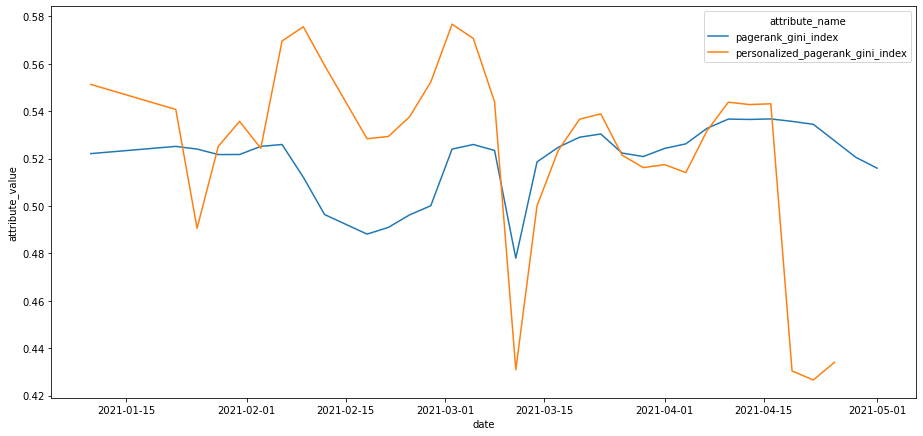

In [20]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
sns.lineplot(ax=ax, data=pr_bog_df, x='date', y='attribute_value', hue='attribute_name')
